## Active Learning

## Introduction 

Active learning is the subset of machine learning in which a learning algorithm can query a user interactively to label data with the desired outputs. In statistics literature, it is sometimes also called optimal experimental design. The information source is also called teacher or oracle.

A growing problem in machine learning is a large amount of unlabeled data since data is continuously getting cheaper to collect and store. This leaves data scientists with more data than they are capable of analyzing. That’s where active learning comes in.

## Motivation

Active learning is the name used for the process of prioritizing the data which needs to be labeled to have the highest impact on training a supervised model. Active learning can be used in situations where the amount of data is too large to be labeled and some priority needs to be made to label the data smartly.

The fundamental belief behind the active learner algorithm concept is that an ML algorithm could potentially reach a higher level of accuracy while using a smaller number of training labels if it were allowed to choose the data it wants to learn from.

Therefore, active learners are allowed to interactively pose queries during the training stage. These queries are usually in the form of unlabeled data instances and the request is to a human annotator to label the instance.

$\textbf{Semi-supervised learning:} $ Semi-supervised learning is an approach to machine learning that combines a small amount of labeled data with a large amount of unlabeled data during training. Semi-supervised learning falls between unsupervised learning (with no labeled training data) and supervised learning (with only labeled training data). It is a special instance of weak supervision.

$\textbf{Active learning:} $

Active learning is closer to traditional supervised learning. It is a type of semi-supervised learning, meaning models are trained using both labeled and unlabeled data. The idea behind semi-supervised learning is that labeling just a small sample of data might result in the same accuracy or better than fully labeled training data. The only challenge is determining what that sample is. Active learning machine learning is all about labeling data dynamically and incrementally during the training phase so that the algorithm can identify what label would be the most beneficial for it to learn from.

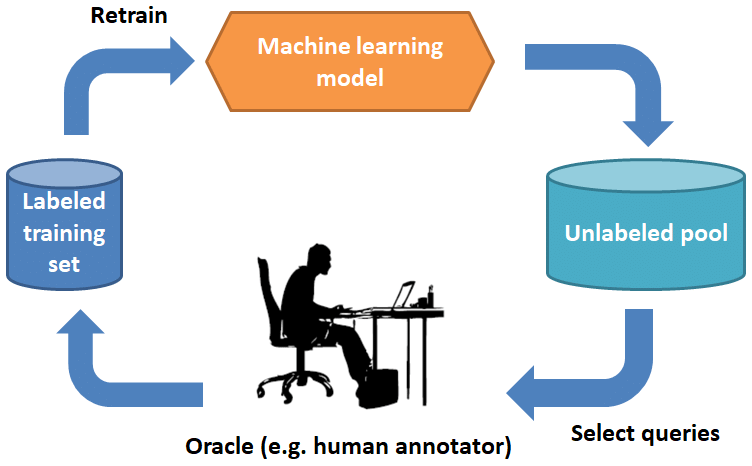

## Application of Active Learning

Active learning has proven especially useful for natural language processing, as building NLP models requires training datasets that have been tagged to indicate parts of speech, named entities, etc. Getting datasets that both feature this tagging and contain enough unique data points can be a challenge.

Active learning has also been useful for medical imaging and other instances in which there’s a limited amount of data that a human annotate can label as necessary to help the algorithm. Although it can sometimes be a slow process, as the model needs to constantly readjust and retrain based on incremental labeling updates, it can still have time savings over traditional data-collection methods.

## Active learning can be implemented through three main approaches:


1. $\textbf{stream-based selective sampling:} $ A stream-based selective sampling approach, in which remaining data points are assessed one by one, and every time the algorithm identifies a sufficiently beneficial data point it requests a label for it. This technique can require considerable human labor.

2. $\textbf{pool-based sampling:} $ A pool-based sampling approach, in which the entire dataset (or some fraction of it) is evaluated first so the algorithm can see which data points will be most beneficial for model development. This approach is more efficient than stream-based selective sampling but does require a lot of computational power and memory.

3. $\textbf{membership query sampling:} $ A membership query synthesis approach, where the algorithm essentially generates its hypothetical data points. This approach only applies to limited scenarios where generating accurate data points is plausible.


## Sampling Methods


Sampling methods also called querying strategies, are critical to the success of the active learning approach. A poor sampling method will lead to poor model predictions and thus more iterations through the active learning cycle. Two of the most common sampling methods are uncertainty sampling and Query by Committee.


$\textbf{Uncertainty Sampling:} $

As its name implies, uncertainty sampling prioritizes data points for labeling that the model is least certain about. There are several techniques applied within this type of sampling:

* $\textbf{Least Confidence:} $ The algorithm sorts its predictions from lowest confidence to highest. Those with the lowest confidence are selected for labeling.

* $\textbf{Smallest Margin:} $  For each data point, the algorithm compares the highest probability class prediction to the second-highest probability class prediction. The data points with the tightest margin will be prioritized for labeling, as the model is least certain which class they belong to.

* $\textbf{Entropy:} $ The machine uses an equation to determine the data points with the highest uncertainty, also known as entropy, in-class prediction. These data points are prioritized for labeling.


$\textbf{Query by Committee:} $

This strategy uses multiple models trained on the same dataset to determine collectively which additional data points to label. Where the models have the largest disagreement are the data points selected for labeling.

Other popular sampling methods include expected impact and density-weighted, although these may be less utilized than those outlined above. In any case, the sampling method used is an important determinant of how quickly the model will reach performance standards.

You may need to experiment with different methods to reach optimal performance, as there’s no single method that works best for every use case.

In [11]:
from sklearn.svm import SVC, LinearSVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import imageio as io
import os
from matplotlib.markers import MarkerStyle
from sklearn.linear_model import LogisticRegression
import random
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

$\textbf{Data:} $

This dataset contains data about 2 species/subspecies of the Iris flower. Each sample has the length of the sepal, the width of the sepal, the length of the petal, and the width of the petal, all in centimeters. Each sample is of one of these two species — Iris versicolor and Iris virginica.

In [12]:
origdata = pd.read_csv("Iris.csv")
f1, f2 = 'PetalLengthCm', 'PetalWidthCm'
data = origdata[[f1, f2, 'Species']].copy()
filter = data['Species'].isin(['Iris-versicolor', 'Iris-virginica'])
data = data[filter]
data[:5]

,PetalLengthCm,PetalWidthCm,Species
50,4.7,1.4,Iris-versicolor
51,4.5,1.5,Iris-versicolor
52,4.9,1.5,Iris-versicolor
53,4.0,1.3,Iris-versicolor
54,4.6,1.5,Iris-versicolor


$\textbf{Label Mapping:} $

 * 0 - Iris-versicolor
 * 1 - Iris-virginica.

In [13]:
X = data[[f1, f2]]
y = data['Species']
print('Classes:')
print(y.unique())
y = y.apply(lambda x: 0 if x == 'Iris-versicolor' else 1)

Classes:
['Iris-versicolor' 'Iris-virginica']


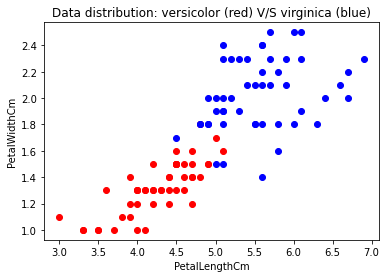

In [14]:
plt.figure()
versicolor = y == 0
virginica = y == 1

plt.scatter(X[f1][versicolor], X[f2][versicolor], c='r')
plt.scatter(X[f1][virginica], X[f2][virginica], c='b')
plt.xlabel(f1)
plt.ylabel(f2)
plt.title("Data distribution: versicolor (red) V/S virginica (blue)")
plt.show()

$\textbf{Approach:} $

We train a Linear SVM kernel on the entire data to understand the SVM model containing all the data. Since this is a linear SVM model, the decision boundary (the boundary separating the two classes) will be a straight line. We look at the slope and the intercept of the decision boundary.

We plot the decision boundary for all the data points. The decision boundary is a straight line in this case (because the model is a Linear SVM).

The classifier0 is the trained classifier(SVM). We get the coefficients from the classifier0.coef_ and classifier0.intercept. a0, b0, c0 are the coefficients of the line (Line Equation: $a0*x + b0*y + c0 = 0; y = -(a0*x + c0)/b0).$ The classifier0 gives us the ideal decision boundary for the given data though the decision boundary might change with different data. In this particular case, this decision boundary is the ideal case. Then, we plot all points in the dataset in blue and red as per their classes.

In [15]:
y = y.astype(dtype=np.uint8)
classifier0 = LinearSVC()
classifier0.fit(X, y)
print(classifier0.coef_)
print(classifier0.intercept_)

[[0.28015253 1.70097545]]
[-4.17110821]


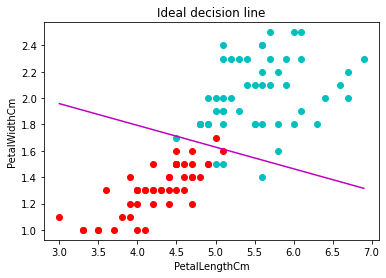

In [17]:
xmin, xmax = X[f1].min(), X[f1].max()
ymin, ymax = X[f2].min(), X[f2].max()
stepx = (xmax - xmin)/99
stepy = (ymax - ymin)/99
a0, b0, c0 = classifier0.coef_[0, 0], classifier0.coef_[0, 1], classifier0.intercept_

lx0 = [xmin + stepx * i for i in range(100)]
ly0 = [-(a0*lx0[i] + c0)/b0 for i in range(100)]

plt.figure()

plt.scatter(X[f1][y==0], X[f2][y==0], c='r')
plt.scatter(X[f1][y==1], X[f2][y==1], c='c')

plt.plot(lx0, ly0, c='m', )
plt.title("Ideal decision line")
plt.xlabel(f1)
plt.ylabel(f2)

plt.show()

$\textbf{Data distribution:} $

Now, we split the dataset into two parts — pool(80%) and test(20%).

In [8]:
X_pool, X_test, y_pool, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_pool, X_test, y_pool, y_test = X_pool.reset_index(drop=True), X_test.reset_index(drop=True), y_pool.reset_index(drop=True), y_test.reset_index(drop=True)

Let us apply the decision function of the SVM to two data points. Generally, for a two-class linear SVM, the decision function outputs positive values for one of the classes (one side of the decision boundary) and negative values for the other class (another side of the decision boundary) and zero on the decision boundary.
For a linear SVM, the magnitude of the decision function is equal to the distance of the data point from the decision function. This is because, if a point is close to the decision boundary, then, it may be an outlier from the class on the other side of the decision boundary.

In [9]:
classifier0.decision_function(X_pool.iloc[6:8])

array([-0.55706883,  0.2633987 ])

$\textbf{uncertain_index:} $ The function uncertain_index gives you the point that is the most ambiguous for this classifier. For an SVM classifier, data is ambiguous if a data point is closer to the decision boundary and less ambiguous if the data point is farther from the decision boundary irrespective of the side of the decision boundary. Thus, the uncertain_index function finds you the most important unlabelled points. These data are closest to the decision boundary compared to the rest of the data.

In [10]:
def uncertain_index(classifier, unknown_indexes):
    
    ind = np.argmin(np.abs( 
        list(classifier.decision_function(X_pool.iloc[unknown_indexes]) )
        ))
    return unknown_indexes[ind]

$\textbf{random_index:} $ The function random_index gives you any random data point. Thus,  the function returns a random index from the unlabelled data. 

In [11]:
def random_index(unknown_indexes):
    ind = random.choice(unknown_indexes)
    return ind

$\textbf{plot_svm:} $

The function, plot_svm, is used to plot the following:

* SVM decision boundary, 
* the data points from the train data according to their class, 
* and the data points in the unknown pool of samples.

$\textbf{classifier:} $

* train_indexes- Indexes of the dataset that are the train data points.
* unknown_indexes- Indexes of the dataset that are the unlabelled pool data points.
* new_index- This is the index of the most ambiguous point in the unlabelled pool

We plot all the unlabelled points from the pool in black. Then, we plot all the points from the train data in different colours (red and blue) as per their class labels. We get the coefficients of the decision boundary (straight line) from the clf.coef_ and clf.intercept. Using this and the formula of a straight line, we plot this line (dashed green line). We also have the ideal decision boundary calculated earlier. This line is also plotted (in magenta).
Finally, we plot the new_index point, that is, the most ambiguous point (yellow star).

In [12]:
def plot_svm(clf, train_indexes, unknown_indexes, plot_ind, new_index = False, title = False, name = False):
    X_train = X_pool.iloc[train_indexes]
    y_train = y_pool.iloc[train_indexes]

    X_unk = X_pool.iloc[unknown_indexes]

    if new_index:
        X_new = X_pool.iloc[new_index]

    a, b, c = clf.coef_[0, 0], clf.coef_[0, 1], clf.intercept_


    lx = [xmin + stepx * i for i in range(100)]
    ly = [-(a*lx[i] + c)/b for i in range(100)]

    fig = plt.figure(figsize=(9,6))
    plt.scatter(X_unk[f1], X_unk[f2], c='k', marker = '.')
    plt.scatter(X_train[f1][y_train==0], X_train[f2][y_train==0], c='r', marker = 'o')
    plt.scatter(X_train[f1][y_train==1], X_train[f2][y_train==1], c='c', marker = 'o')
    

    plt.plot(lx, ly, c='m')
    plt.plot(lx0, ly0, '--', c='g')

    if new_index:
        plt.scatter(X_new[f1], X_new[f2], c='y', marker="*", s=125)
        plt.scatter(X_new[f1], X_new[f2], c='y', marker="*", s=125)
        plt.scatter(X_new[f1], X_new[f2], c='y', marker="*", s=125)
        plt.scatter(X_new[f1], X_new[f2], c='y', marker="*", s=125)
        plt.scatter(X_new[f1], X_new[f2], c='y', marker="*", s=125)

    if title:
        plt.title(title)
    
    plt.xlabel(f1)
    plt.ylabel(f2)

    if name:
        plt.savefig(name, dpi=100)
        plt.close(fig)

In [13]:
train_indexes = list(range(10))
unknown_indexes = list(range(10, 80))
X_train = X_pool.iloc[train_indexes]
y_train = y_pool.iloc[train_indexes]
classifier = LinearSVC()
classifier.fit(X_train, y_train)

folder = "image-folder/"


try:
    os.mkdir(folder)
except:
    pass

filenames = ["ActiveLearningTitleSlide2.jpg"] * 2


In [14]:
t = []
for i in range(10):
    X_train = X_pool.iloc[train_indexes]
    y_train = y_pool.iloc[train_indexes]
    classifier = LinearSVC()
    classifier.fit(X_train, y_train)
    title, name = "Iteration "+str(i+1), folder + ("uncertain_%d.jpg" % (i+1))

    n = uncertain_index(classifier, unknown_indexes)
    train_indexes.append(n)
    unknown_indexes.remove(n)
    plot_svm(classifier, train_indexes, unknown_indexes, [5, 4, i+1], n, title, name)
    filenames.append(name)

$\textbf{Active learning implementation:} $

Then, we train an SVM on the train data, and we find the most ambiguous point and create a new plot with this point as a yellow star and also plot the decision boundary of the trained SVM.

$\textbf{Algorithm :} $
1. We take the first 10 indexes/data points of the pool as the initial train data and the rest 70 points as the unlabelled samples. 
2. We create the beginning plot with all the unlabelled samples, the ideal decision boundary, and the 10 train data points.
3. Then, we train an SVM on the train data, and we find the most uncertain point and create a new plot with this point as a yellow star and also plot the decision boundary of the trained SVM.

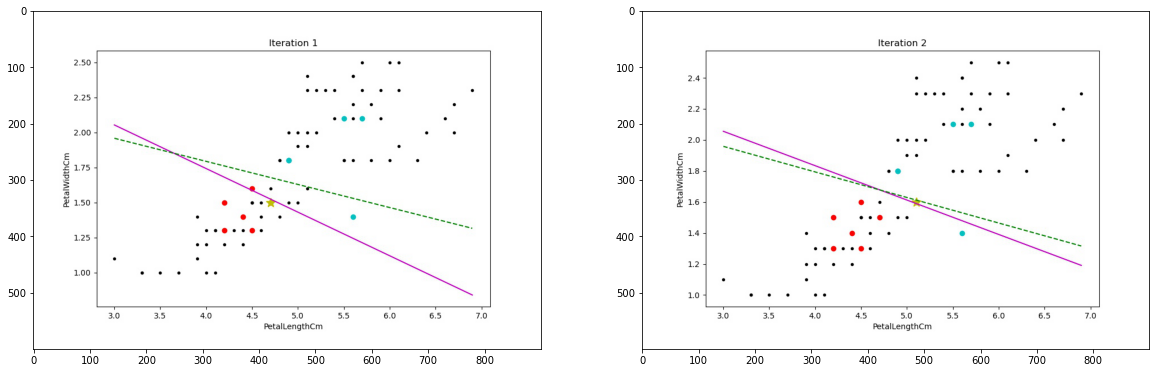

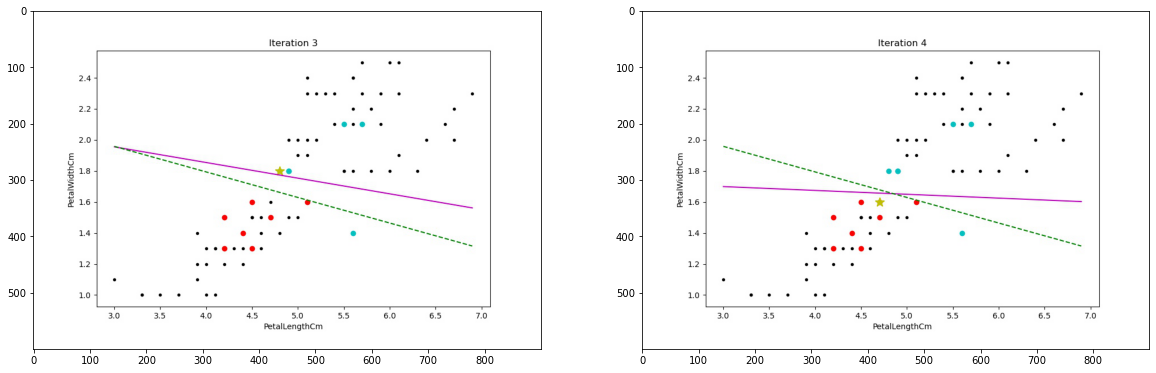

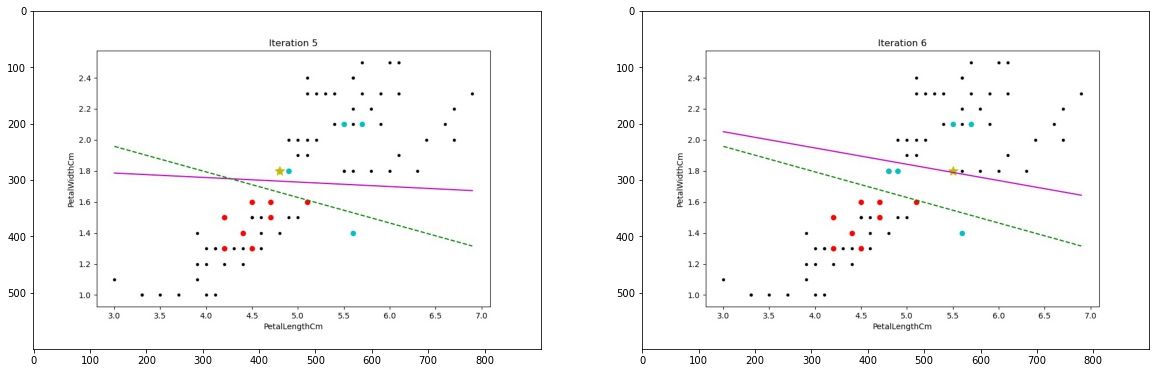

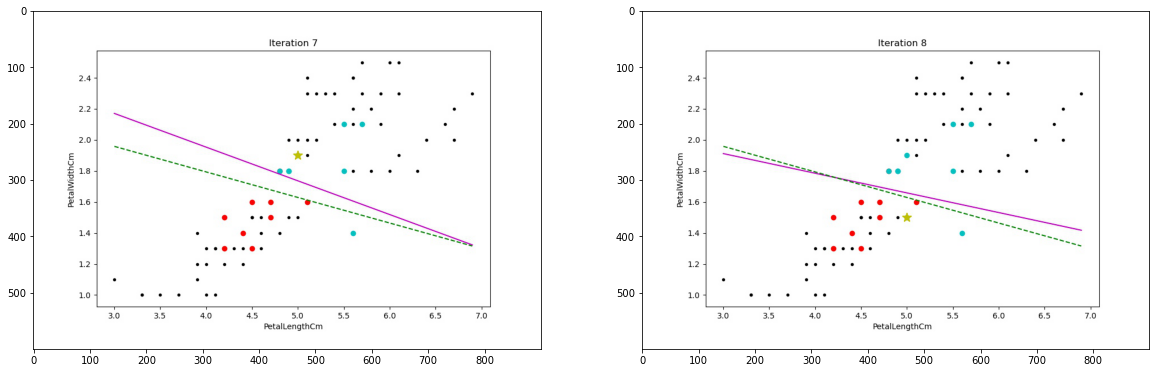

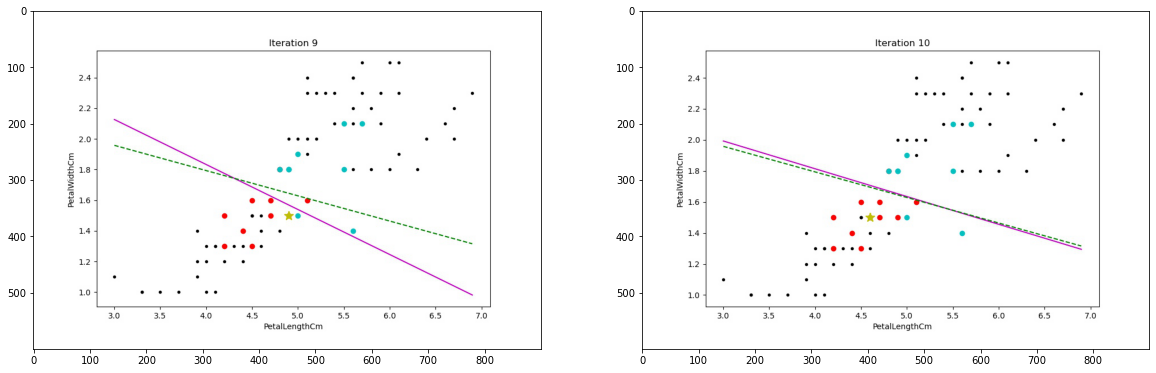

In [15]:
# figure size in inches optional
rcParams['figure.figsize'] = 20 ,10

for i in range(5):
    # read images
    img_A = mpimg.imread("image-folder/uncertain_{}.jpg".format(2*i+1))
    img_B = mpimg.imread("image-folder/uncertain_{}.jpg".format(2*i+2))

    # display images
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img_A)
    ax[1].imshow(img_B)

$\textbf{Random sampling implementation:} $

Then, we train an SVM on the train data, and we find the most ranmdom point and create a new plot with this point as a yellow star and also plot the decision boundary of the trained SVM.

$\textbf{Algorithm :} $
1. We take the first 10 indexes/data points of the pool as the initial train data and the rest 70 points as the unlabelled samples. 
2. We create the beginning plot with all the unlabelled samples, the ideal decision boundary, and the 10 train data points.
3. Then, we train an SVM on the train data, and we find the most ranmdom point and create a new plot with this point as a yellow star and also plot the decision boundary of the trained SVM.

In [16]:
train_indexes = list(range(10))
unknown_indexes = list(range(10, 80))
X_train = X_pool.iloc[train_indexes]
y_train = y_pool.iloc[train_indexes]

In [17]:
for i in range(10):    
    X_train = X_pool.iloc[train_indexes]
    y_train = y_pool.iloc[train_indexes]
    classifier = LinearSVC()
    classifier.fit(X_train, y_train)
    title, name = "Iteration "+str(i+1), folder + ("random_%d.jpg" % (i+1))

    n = random_index(unknown_indexes)
    train_indexes.append(n)
    unknown_indexes.remove(n)
    plot_svm(classifier, train_indexes, unknown_indexes, [5, 4, i+1], n, title, name)
    filenames.append(name)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


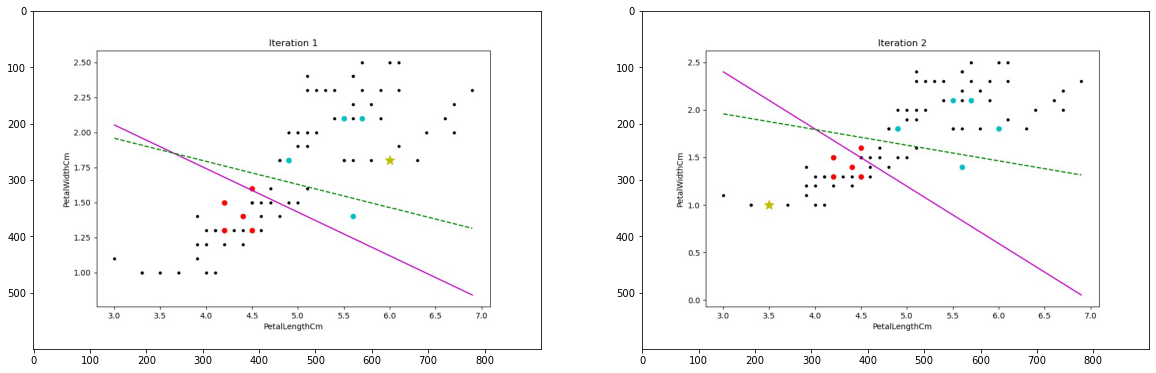

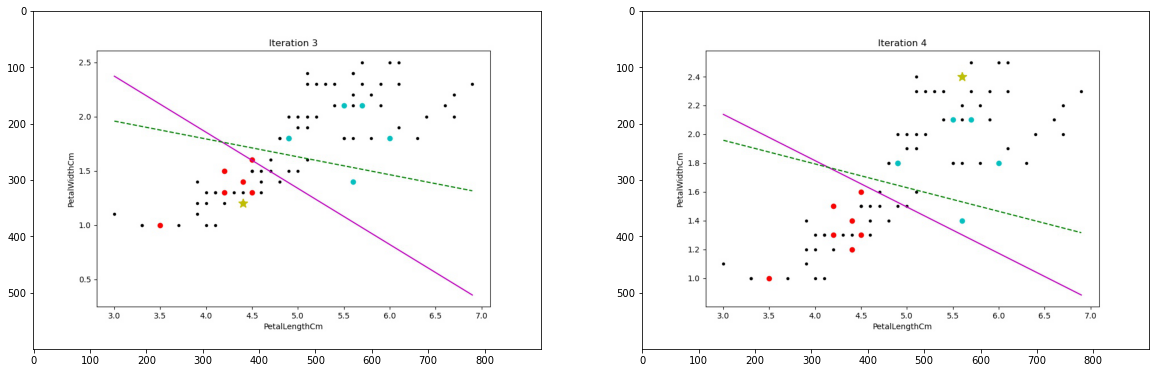

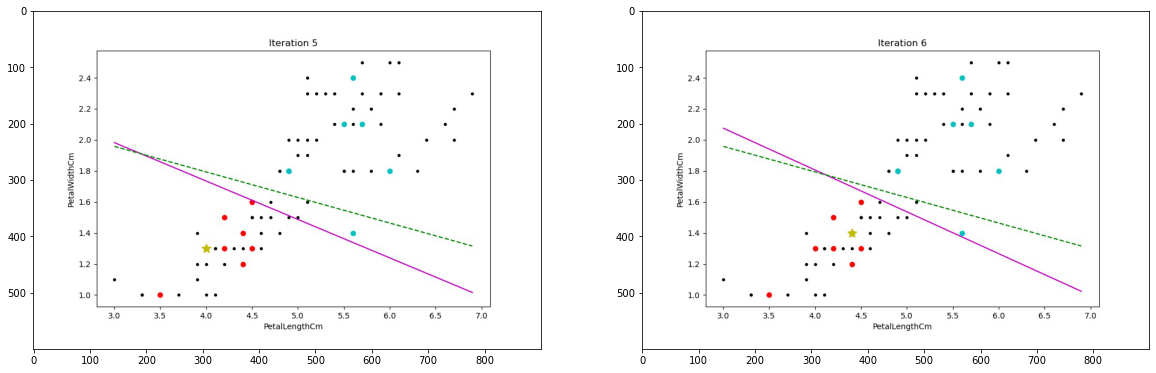

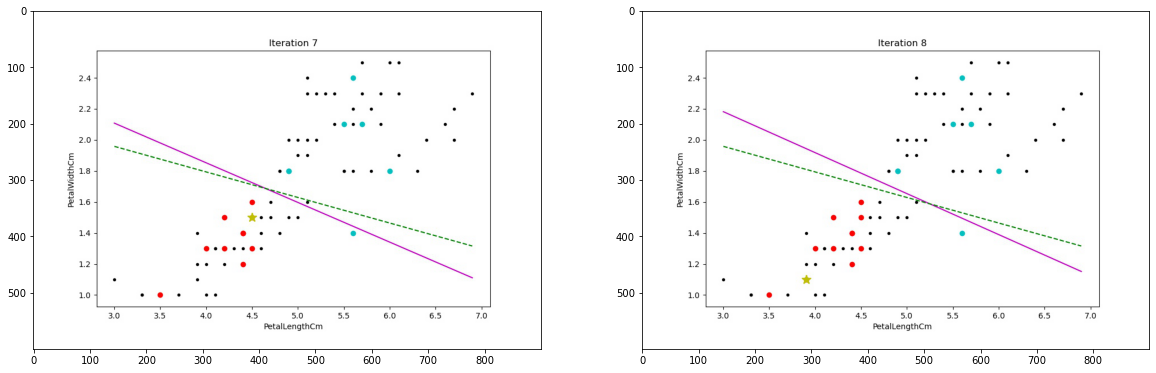

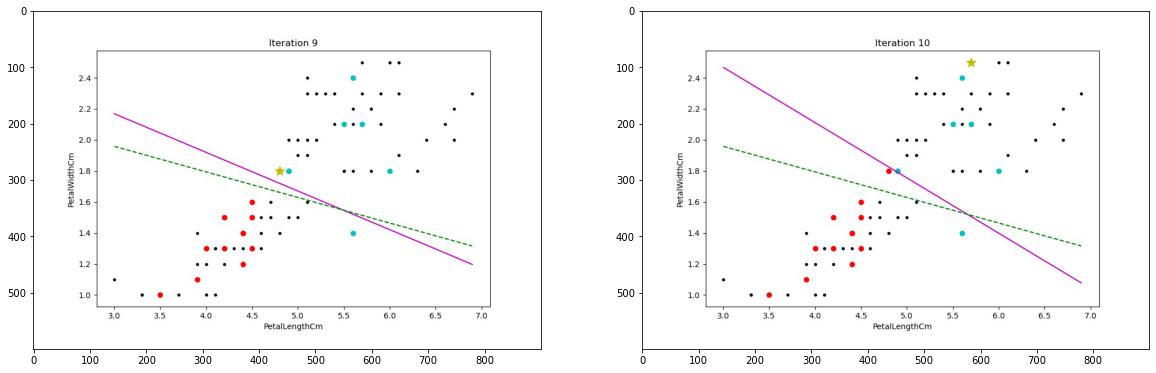

In [18]:
# figure size in inches optional
rcParams['figure.figsize'] = 20 ,10

for i in range(5):
    # read images
    img_A = mpimg.imread("image-folder/random_{}.jpg".format(2*i+1))
    img_B = mpimg.imread("image-folder/random_{}.jpg".format(2*i+2))

    # display images
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img_A)
    ax[1].imshow(img_B)

$\textbf{Comparison between Random sampling and Active learning:} $

Text(0.5, 1.0, 'Random sampling')

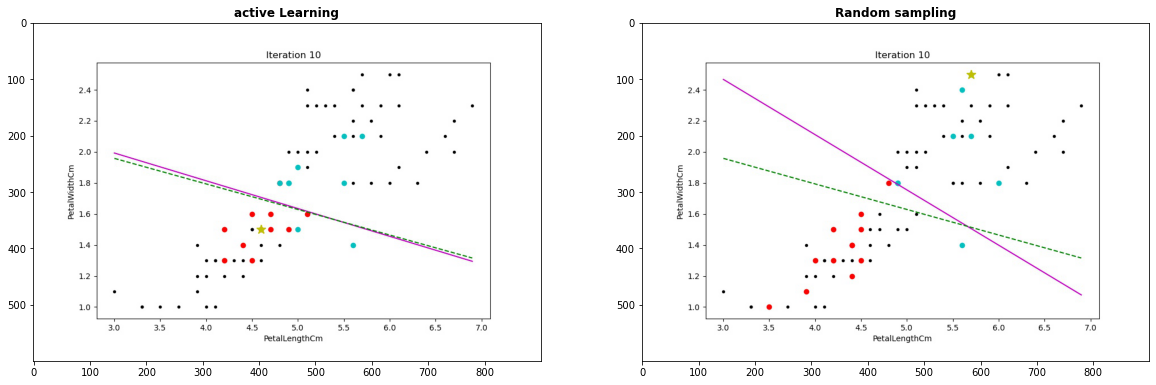

In [19]:
img_A = mpimg.imread("image-folder/uncertain_10.jpg")
img_B = mpimg.imread("image-folder/random_10.jpg")

# display images
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.set_title('active Learning', fontweight ="bold")
ax.imshow(img_A)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(img_B)
ax.set_title('Random sampling', fontweight ="bold")

## Result

With 10 iterations each with active learning and random sampling, we learned that active learning does a better approximation of the decision line. In the case of random sampling, each additional data does not contribute that much since it may or may not be near the decision boundary thus the decision boundary of the first iteration versus the last is similar and there is no significant improvement. While in the case of active learning, we see with each iteration the decision boundary gets closer to the ideal decision boundary. the 10th iteration is almost the same as the ideal decision boundary. In this type of scenario, active learning plays an important role to choose unlabelled data in a way that improves the model performance and keeps the cost of training data smaller.